
# Data preparation

**SPAE-CS-DS A Data Science Short Course**

<small>Lecturer: Dr. CHAN, Chung<br>Department of Computer Science</small>
___

**Instructions:**

You will use the [`nbgrader` notebook extension](https://nbgrader.readthedocs.io/en/stable/) to fetch and submit the jupyter notebooks for the course. These notebooks contain both demos and exercises under different topics.

- To fetch the notebooks:
    1. Go to (https://ltjh.cs.cityu.edu.hk/)
    1. Login with you CityU EID.
    1. Go to the `Assignments` tab and select the course `SPAE-CS-DS`.
    1. Click `Fetch` to download `lec01`.
    1. You can open the notebooks in the folder, which is also available in your home directory.
    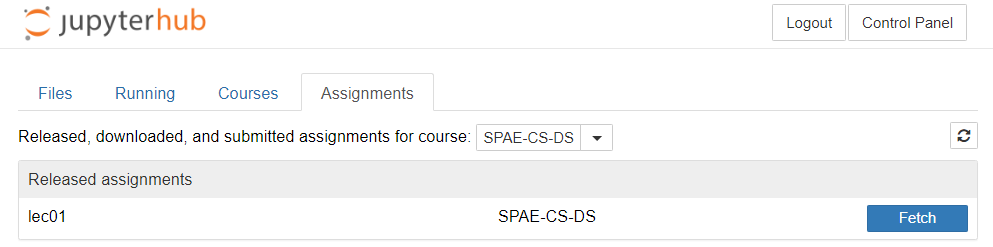
- If you cannot see the assignment page, first check if you have the file '~/.jupyter/nbgrader_config.py'. If you have, *remove* that file and try again.

- Edit the notebooks to fill in your answers. Once you are done:
 1. Click `Validate` to check your answers on some pre-defined test cases.
 1. Click `Submit` to submit your notebooks.
    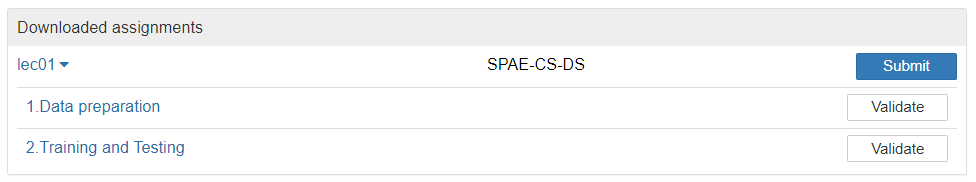 
    
___

## Background

Data needs to be loaded into memory before we can operate on them. This notebook demonstrates how to load and operate on a dataset.

As an example, we will use a popular dataset called the [*iris dataset*](https://en.wikipedia.org/wiki/Iris_flower_data_set). Iris is a flower with three different species shown below.

<span style="text-align: center;">
    <div style="display: flex;">
        <div style="padding: 1em;">
            <img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Iris Setosa" style="width: 300px;">
            Iris Setosa
        </div>
        <div style="padding: 1em;">
            <img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" alt="Iris Versicolor" style="width: 300px;">
            Iris Setosa
        </div>
        <div style="padding: 1em;">
            <img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" alt="Iris Virginica" style="width: 300px;">
            Iris Virginica
        </div>
    </div>
</span>


The three iris species differ in the lengths and widths of their *petals* and *sepals*.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg" style="width: 300px" alt="Petal and Sepal"></center>

A standard data mining task is train a model that can classify the spieces (*target*) automatically based on the lengths and widths of the petals and sepals (*input features*).

Before we begin coding, execute [line magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#line-magics) `%reset` to get a clean environment. 
Use `shift+enter` to evaluate the code cell below.

In [ ]:
%reset -f

## Loading a dataset from scikit-learn

To load the iris dataset, we can simply import the [`sklearn.datasets` package](https://scikit-learn.org/stable/datasets/index.html).

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris) # object type

`sklearn` stores the dataset as a [`Bunch` object](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html), which is essentially [a bunch of properties](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) put together.

In particular, the most important property is `data`, which contains the data matrix.

In [ ]:
iris.data # write the data property to the output cell

The data field is just a matrix of numbers. To mine knowledge from data, we need to know more about the data.

The property `DESCR` (description) contains some background information of the dataset. We can pretty-print the description as follows.

In [ ]:
print(iris.DESCR)

**Exercise** Using the [cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cell-magics) `%%html` to open the documentation of the iris dataset to learn more about the data.

In [ ]:
%%html
<iframe src="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris" width="100%" height="300px"></iframe>

**Exercise** Write a simple function `num_instances` that returns the number of instances in a dataset loaded from `sklearn`.

*Hint: Use the function `len`.*

In [ ]:
help(len) # documentation of len. You can also use Shift+Tab to show the docstring.

In [ ]:
from sklearn.utils import Bunch

def num_instances(dataset):
    """Returns the number of instances in an sklearn dataset.
    
    Parameters:
    dataset (sklearn.utils.Bunch): A dataset from sklearn.
    
    Return:
    int: Number of instances in dataset.
    """
    if not isinstance(dataset,Bunch):
        raise TypeError("Only sklearn datasets are allowed.")
    # YOUR CODE HERE
    raise NotImplementedError()
    return n

print("The iris dataset contains {:d} instances.".format(num_instances(iris)))
# See string-formatting: https://docs.python.org/3.4/library/string.html#string-formatting

In [ ]:
assert num_instances(iris) == 150 # a test of your code

## Creating and processing a DataFrame using pandas

The [package `pandas`](https://pandas.pydata.org/docs/user_guide/index.html) provides a lot of useful tools to operate on a dataset. 
We will first translate the `Bunch` object into a `pandas` [`DataFrame` object](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame).

In [ ]:
import pandas as pd

# write the input features first
iris_df = pd.DataFrame(data = iris.data, 
                       columns = iris.feature_names)

# append the target values to the last column
iris_df['target'] = iris.target

iris_df # to display the dataframe

In jupyter notebook, a `DataFrame` object is conveniently displayed as an HTML table, so there is no need `print` it. We can control how much information to show by setting the [display options](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).

We can also display the statistics of different numerical attributes using the method `describe` and `boxplot`.

In [ ]:
iris_df.describe()

In [ ]:
%matplotlib inline
iris_df.boxplot(figsize=(10,5)) # figsize specifies figure (width,height) in inches

The line magic [`%matplotlib`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) specifies where the plot should appear.

**Exercise** Using the [interactive `ipywidget`](https://ipywidgets.readthedocs.io/en/latest/) below, explore the different commands for selecting different rows or a `DataFrame`.

In [ ]:
from ipywidgets import interact
from IPython.display import display

@interact(command=['iris_df.head()',
                   'iris_df[0:4]',
                   'iris_df.iloc[0:4]',
                   'iris_df.loc[0:4]',
                   'iris_df.loc[iris_df.index.isin(range(0,4))]',
                   'iris_df.loc[lambda df: df.target==0]',
                   'iris_df.tail()',
                   'iris_df[-1:]'])
def select_rows(command):
    output = eval(command)
    print('type: {}'.format(type(output)))
    print('output:')
    display(output)

**Exercise** Explore the different commands for selecting columns.

In [ ]:
@interact(command=['iris_df.target',
                   'iris_df["target"]',
                   'iris_df[["target"]]',
                   'iris_df[iris_df.columns[:-1]]',
                   'iris_df.loc[:,iris_df.columns[0]:iris_df.columns[-1]]',
                   'iris_df.loc[:,~iris_df.columns.isin(["target"])]',
                   'iris_df.iloc[:,:-1]'])
def select_columns(command):
    output = eval(command)
    print('type: {}'.format(type(output)))
    print('output:')
    display(output)

### Handling the nominal class attribute

Note that the boxplot also covers the target attribute, but it should not. (Why?) Let's take a look at the current datatypes of the different attributes.

In [ ]:
print(iris_df.dtypes)

The target is regarded as a numeric attribute with type integer `int64`. Instead, the target should be categorical with only allow three possible values, one for each iris species.

To fix this, we can use the `astype` method to convert the data type automatically. (More details [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#series-creation.section).)

In [ ]:
iris_df.target = iris_df.target.astype('category')
iris_df.boxplot(figsize=(10,5)) # target is not plotted as expected
iris_df.target.dtype

**Exercise** Rename the target categories 0, 1, and 2 to the more meaningful names of the iris species in `iris.target_names`.

*Hint: See the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#renaming-categories).*

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

iris_df # check that the target values are now setosa, versicolor, or virginica.

In [ ]:
# test your code
assert iris_df.target.cat == pd.CategoricalDtype(['setosa', 'versicolor', 'virginica'], ordered=False)

**Exercise** Learn the method `fillna` using the cell below.

In [ ]:
# create more cells above or below his cell by using the keys 'a' and 'b' respectively.

 See the `pandas` documenation on [working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

## Create DataFrame from other file formats

The following code loads an [Attribute-Relation-File-Format (ARFF) file](https://waikato.github.io/weka-wiki/formats_and_processing/arff/) from the [OpenML website](https://www.openml.org/d/61).

In [ ]:
from scipy.io import arff
import urllib.request
import io

ftpstream = urllib.request.urlopen('https://www.openml.org/data/download/61/dataset_61_iris.arff')
iris_arff = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))
iris_df3 = pd.DataFrame(iris_arff[0])
iris_df3['class'] = iris_df3['class'].astype('category')
iris_df3

**Exercise:** The following command reads the iris dataset from a CSV file available in the [UCI respository](https://archive.ics.uci.edu/ml/datasets/iris). Use the additional options `header` and `name` of `read_csv` to create the same dataframe as `iris_df`.

In [ ]:
iris_df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
            sep=',',
            dtype={'target':'category'},
            # YOUR CODE HERE
            raise NotImplementedError()
            ) 
iris_df2

In [ ]:
# test your code
assert len(iris_df2.index)==150
assert iris_df2.target.cat == pd.CategoricalDtype(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False)

**Feedback**

Thanks for completing the notebook. Please let us know any bugs, issues, and possible improvements. If you like any parts of this notebook, we will be very happy to hear from you too! Remember to click `Submit` under the `Assignments` tab of this course.
___
Your feedback here.

___